<h1 align="center" style="color:#FF0800">
 Обробка та аналіз БМД.<br>
 Группа: БС-83<br>
 Мельничук Я.O.<br>
 Практикум Номер 5<br\></h1>

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
table = pd.DataFrame({'N1':[10,45,50,6,36],
                      'N2':[21,38,5,19,20]},
                    index = ['O_1','O_2','O_3','O_4','O_5'])
table

,N1,N2
O_1,10,21
O_2,45,38
O_3,50,5
O_4,6,19
O_5,36,20


2. Побудувати графік, що відображає розподіл ознак в групах.

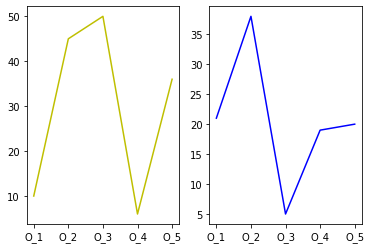

In [3]:
plt.subplot(1, 2, 1) 
plt.plot(table.index, table['N1'], 'y')

plt.subplot(1, 2, 2) 
plt.plot(table.index, table['N2'], 'b')

Text(0.5, 0, 'Градація ознак')

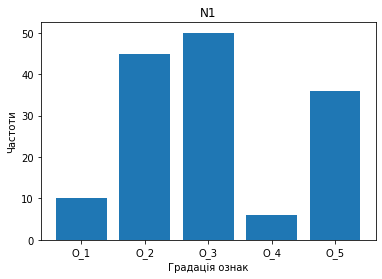

In [4]:
plt.bar(table.index, table['N1'])
plt.title("N1")
plt.ylabel("Частоти")
plt.xlabel("Градація ознак")

Text(0.5, 0, 'Градація ознак')

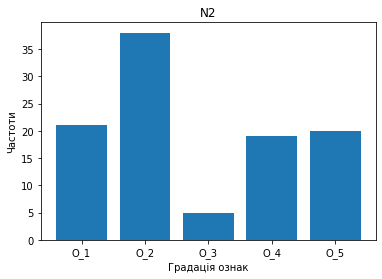

In [5]:
plt.bar(table.index, table['N2'])
plt.title("N2")
plt.ylabel("Частоти")
plt.xlabel("Градація ознак")

3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [6]:
def Pirson_x_sq (table, significant_level, num_level):
  
    print("-------------------------------------------")
    print("significant_level = ", significant_level)
    print("-------------------------------------------")
    zm = 0
    proba = 0
    x_emp = 0
    gr_n=[]   
    gr_n_div=[] 
    
    l_st=len(table.iloc[:,0])
    for i in range(l_st):
        zm = table.iloc[i,0] - table.iloc[i,1]
        zm_sq = zm**2 
        gr_n.append(zm_sq)
        zm_sq_div = zm_sq/table.iloc[i,1] 
        gr_n_div.append(zm_sq_div)
        x_emp += zm_sq_div 
  
    table["(n-n')^2"] = gr_n         
    table["(n-n')^2 / n"] = gr_n_div
    print(table)
    print('')
    print("Сума отриманих значень: χ^2 =",x_emp)
    
    
    p= l_st - 1
    print("Ступінь свободи: p =",p)
    


    import xlrd, xlwt
    
    rb = xlrd.open_workbook('x_criticale.xlsx')
    
    sheet = rb.sheet_by_index(0)
    
    
    x_kr = sheet.row_values(p+1)[num_level]
    print("χ^2 критичне = ", x_kr)
    
    text_ = 0   
    if((x_emp**2) > (x_kr**2)):
        text_ = "Розбіжність значима бо χ^2 > χ^2(критичне)"%table
        result = "significant"
    else:
        text_ = "Розбіжність незначима бо χ^2 < χ^2(критичне)"%table
        result = "not significant"
    print(text_)
    print("")
    return result

In [7]:
Pirson_x_sq (table, 0.01, 1)

-------------------------------------------
significant_level =  0.01
-------------------------------------------
     N1  N2  (n-n')^2  (n-n')^2 / n
O_1  10  21       121      5.761905
O_2  45  38        49      1.289474
O_3  50   5      2025    405.000000
O_4   6  19       169      8.894737
O_5  36  20       256     12.800000

Сума отриманих значень: χ^2 = 433.74611528822055
Ступінь свободи: p = 4
χ^2 критичне =  13.3
Розбіжність значима бо χ^2 > χ^2(критичне)



'significant'

Написати функцію для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant)

In [8]:
Pirson_x_sq (table, 0.05, 2)

-------------------------------------------
significant_level =  0.05
-------------------------------------------
     N1  N2  (n-n')^2  (n-n')^2 / n
O_1  10  21       121      5.761905
O_2  45  38        49      1.289474
O_3  50   5      2025    405.000000
O_4   6  19       169      8.894737
O_5  36  20       256     12.800000

Сума отриманих значень: χ^2 = 433.74611528822055
Ступінь свободи: p = 4
χ^2 критичне =  9.5
Розбіжність значима бо χ^2 > χ^2(критичне)



'significant'

Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами)

In [10]:
s_1 = 0
s_2 = 0

len_st=len(table.iloc[:,0])

for i in range(len_st):
    s_1 += table.iloc[i,0]
    
for i in range(len_st):
    s_2 += table.iloc[i,1]

gr_1_per = []
gr_2_per = []

m1 = 0
for i in range(len_st):
    m1 = (table.iloc[i,0] * 100) / s_1
    m1 = float('{:.5f}'.format(m1)) 
    gr_1_per.append(m1)

m2 = 0
for i in range(len_st):
    m2 = (table.iloc[i,1] * 100) / s_2
    m2 = float('{:.5f}'.format(m2)) 
    gr_2_per.append(m2)

#Формуємо таблицю
new_table = pd.DataFrame({'N1':[10,45,50,6,36],
                      'N2':[21,38,5,19,20]},
                    index = ['O_1','O_2','O_3','O_4','O_5'])

new_table["N1 %"] = gr_1_per         
new_table["N2 %"] = gr_2_per
print(new_table)

     N1  N2      N1 %      N2 %
O_1  10  21   6.80272  20.38835
O_2  45  38  30.61224  36.89320
O_3  50   5  34.01361   4.85437
O_4   6  19   4.08163  18.44660
O_5  36  20  24.48980  19.41748


In [ ]:
result_table = pd.DataFrame( {"Рівень значимості":[Pirson_x_sq (table, 0.01, 1), Pirson_x_sq (table, 0.05, 2)]},
                        index = ["0.01","0.05"])
result_table.columns.name = "significant level"
result_table

Висновок:

Під час порівняння декількох груп за розподіленням ознаки за допомогою Критерію Пірсона, було отримано результат, що статична розбіжність між групами на рівнях значимості 0.05 і 0.01 є значимою, так як в двох випадках χ^2 > χ^2(критичне)